# S1 Coursework - Part C

In [15]:
import numpy as np
from tabulate import tabulate

# Import overall distribution which is a combination of the signal and background distributions
from Stats_Analysis import Signal_Background

## Part C
### Calculating Projected Probabilities
Marginal probabilities are obtained by integrating out the influence of the other variable, effectively projecting the joint probability distribution onto a given signuluar axes.

#### The marginal probability $f(X)$
Calculayed by integrating out $Y$ from the joint probability $f(X, Y)$:

$$
f(X) = \int_{-\infty}^\infty f(X, Y) \, dY \\
f(X) = \int_{-\infty}^\infty f g_s(X) h_s(Y) + (1 - f)g_b(X) h_b(Y) \, dY \\
f(X) = f \int_{-\infty}^\infty g_s(X) h_s(Y) \, dY + (1 - f) \int_{-\infty}^\infty g_b(X) h_b(Y) \, dY \\
f(X) = f g_s(X) \int_{-\infty}^\infty h_s(Y) \, dY + (1 - f)  g_b(X) \int_{-\infty}^\infty h_b(Y) \, dY \\ 
f(X) = f g_s(X) + (1 - f) g_b(X)
$$
where:
- g_s(X) is the PDF of the Crytsal Ball Distribution
- g_b(X) is the PDF of the Unifrom Distribution

#### The marginal probability $f(Y)$
Calculayed by integrating out $X$ from the joint probability $f(X, Y)$:

$$
f(Y) = \int_{-\infty}^\infty f(X, Y) \, dX \\
f(Y) = \int_{-\infty}^\infty f g_s(X) h_s(Y) + (1 - f)g_b(X) h_b(Y) \, dX \\
f(Y) = f \int_{-\infty}^\infty g_s(X) h_s(Y) \, dX + (1 - f) \int_{-\infty}^\infty g_b(X) h_b(Y) \, dX \\
f(Y) = f h_s(Y) \int_{-\infty}^\infty g_s(X) \, dX + (1 - f) h_b(Y) \int_{-\infty}^\infty g_b(X) \, dX \\ 
f(Y) = f h_s(Y) + (1 - f) h_b(Y)
$$
where:
- h_s(X) is the PDF of the Exponential Distribution
- h_b(X) is the PDF of the Normal Distribution

### Calculating Marginal Cummulative Probabilities
Marginal cummulative probabilities are acheived in a similiar way and result in the following

#### The marginal cummulative probability $F(X)$
Calculayed by integrating out $Y$ from the joint probability $f(X, Y)$:

$$
f(X) = f G_s(X) + (1 - f) G_b(X)
$$
where:
- G_s(X) is the CDF of the Crytsal Ball Distribution
- G_b(X) is the CDF of the Unifrom Distribution

#### The marginal cummulative probability $F(Y)$
Calculayed by integrating out $X$ from the joint probability $f(X, Y)$:

$$
F(Y) = f H_s(Y) + (1 - f) H_b(Y)
$$
where:
- H_s(X) is the CDF of the Exponential Distribution
- H_b(X) is the CDF of the Normal Distribution

### Define the overall distribution

In [16]:
# Parameters for Crystal Ball distribution
mean = 3
sigma = 0.3
beta = 1
m = 1.4

# Parameters for Exponential Decay distribution
lamb = 0.3

# Parameters for Normal distribution
mean_b = 0
sigma_b = 2.5

# Parameters for fraction of signal
f = 0.6

# Parameters
x_lower_trunc = 0
x_upper_trunc = 5
y_lower_trunc = 0
y_upper_trunc = 10

# Parameters in a table
print("Overall Distribution Parameters")

parameters = {
    "Part": ["Signal", "Signal", "Signal", "Signal", "Signal", "Background", "Background", "Background", "Overall", "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Distribution": ["Crystal Ball", "Crystal Ball", "Crystal Ball", "Crystal Ball", "Exponential Decay", "Uniform", "Normal", "Normal", '', "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Parameter": ["Mean", "Sigma", "Beta", "M", "Lambda", "N/A", "Mean", "Sigma", "Fraction" ,"X Lower", "X Upper", "Y Lower", "Y Upper"],
    "Value": [mean, sigma, beta, m, lamb,'N/A', mean_b, sigma_b, f,  x_lower_trunc, x_upper_trunc, y_lower_trunc, y_upper_trunc]
}
df = pd.DataFrame(parameters)
print(df.to_markdown(index=False))

# Declare the overall distribution with parameters
overall = Signal_Background(mean, sigma, beta, m, lamb, mean_b, sigma_b, f, x_lower_trunc, x_upper_trunc, y_lower_trunc, y_upper_trunc)

Overall Distribution Parameters
| Part       | Distribution      | Parameter   | Value   |
|:-----------|:------------------|:------------|:--------|
| Signal     | Crystal Ball      | Mean        | 3       |
| Signal     | Crystal Ball      | Sigma       | 0.3     |
| Signal     | Crystal Ball      | Beta        | 1       |
| Signal     | Crystal Ball      | M           | 1.4     |
| Signal     | Exponential Decay | Lambda      | 0.3     |
| Background | Uniform           | N/A         | N/A     |
| Background | Normal            | Mean        | 0       |
| Background | Normal            | Sigma       | 2.5     |
| Overall    |                   | Fraction    | 0.6     |
| Truncation | Truncation        | X Lower     | 0       |
| Truncation | Truncation        | X Upper     | 5       |
| Truncation | Truncation        | Y Lower     | 0       |
| Truncation | Truncation        | Y Upper     | 10      |
Maximum PDF value found: 0.21804724534774383


## Marginal Probabilities

[Relavent Code and Documentation for Marginal PDF/ CDF](https://s1-coursework.readthedocs.io/en/latest/Stats_Analysis/Compound_Dist/Signal_Background_Class.html#Stats_Analysis.Compound_Dist.Signal_Background_Class.Signal_Background.marginal_cdf_x)

- Due to the moduluar use of class structure these can be easily defined using the consituent PDF's and CDF's from the equation derivated above
- These equations are implemeted within the class as

    | Role                | Class Function              |
    |---------------------|-----------------------------|
    | Marginal PDF in X, $f(X)$ | `marginal_pdf_x(x_value)` |
    | Marginal PDF in Y, $f(Y)$ | `marginal_pdf_y(y_value)` |
    | Marginal CDF in X, $F(X)$ | `marginal_cdf_x(x_value)` |
    | Marginal CDF in Y, $F(Y)$ | `marginal_cdf_y(y_value)` |


- All of them return values in the format: **Signal Component**, **Background Component**, **Total Marginal Probability**

### Examples of calculations
- Below shows a simple examples of these being implemented which can then be cross referenced with the plots

In [17]:
x = 2.5
y = 5

marg_pdf_x_signal, marg_pdf_x_background, marg_pdf_x = overall.marginal_pdf_x(x)
marg_pdf_y_signal, marg_pdf_y_background, marg_pdf_y = overall.marginal_pdf_y(y)

marg_cdf_x_signal, marg_cdf_x_background, marg_cdf_x = overall.marginal_cdf_x(x)
marg_cdf_y_signal, marg_cdf_y_background, marg_cdf_y = overall.marginal_cdf_y(y)

# Print results in a table
marginal_data = [
    ["Marginal PDF in X", x, marg_pdf_x_signal, marg_pdf_x_background, marg_pdf_x],
    ["Marginal PDF in Y", y, marg_pdf_y_signal, marg_pdf_y_background, marg_pdf_y],
    ["Marginal CDF in X", x, marg_cdf_x_signal, marg_cdf_x_background, marg_cdf_x],
    ["Marginal CDF in Y", y, marg_cdf_y_signal, marg_cdf_y_background, marg_cdf_y],
]
headers = ["Metric", "Input", "Signal Component", "Background Component", "Total"]
print(tabulate(marginal_data, headers=headers, tablefmt="grid"))

+-------------------+---------+--------------------+------------------------+----------+
| Metric            |   Input |   Signal Component |   Background Component |    Total |
+===================+=========+====================+========================+==========+
| Marginal PDF in X |     2.5 |          0.214395  |              0.08      | 0.294395 |
+-------------------+---------+--------------------+------------------------+----------+
| Marginal PDF in Y |     5   |          0.0422678 |              0.0172782 | 0.059546 |
+-------------------+---------+--------------------+------------------------+----------+
| Marginal CDF in X |     2.5 |          0.158195  |              0.2       | 0.358195 |
+-------------------+---------+--------------------+------------------------+----------+
| Marginal CDF in Y |     5   |          0.490545  |              0.381824  | 0.872369 |
+-------------------+---------+--------------------+------------------------+----------+


##  Plotting Marginal Probabilities
- These are automatically printed over entire defined region using `.plot_marginal()`

[Relavent Code and Documentation for Plotting Marginals](https://s1-coursework.readthedocs.io/en/latest/Stats_Analysis/Compound_Dist/Signal_Background_Class.html#Stats_Analysis.Compound_Dist.Signal_Background_Class.Signal_Background.plot_marginal)


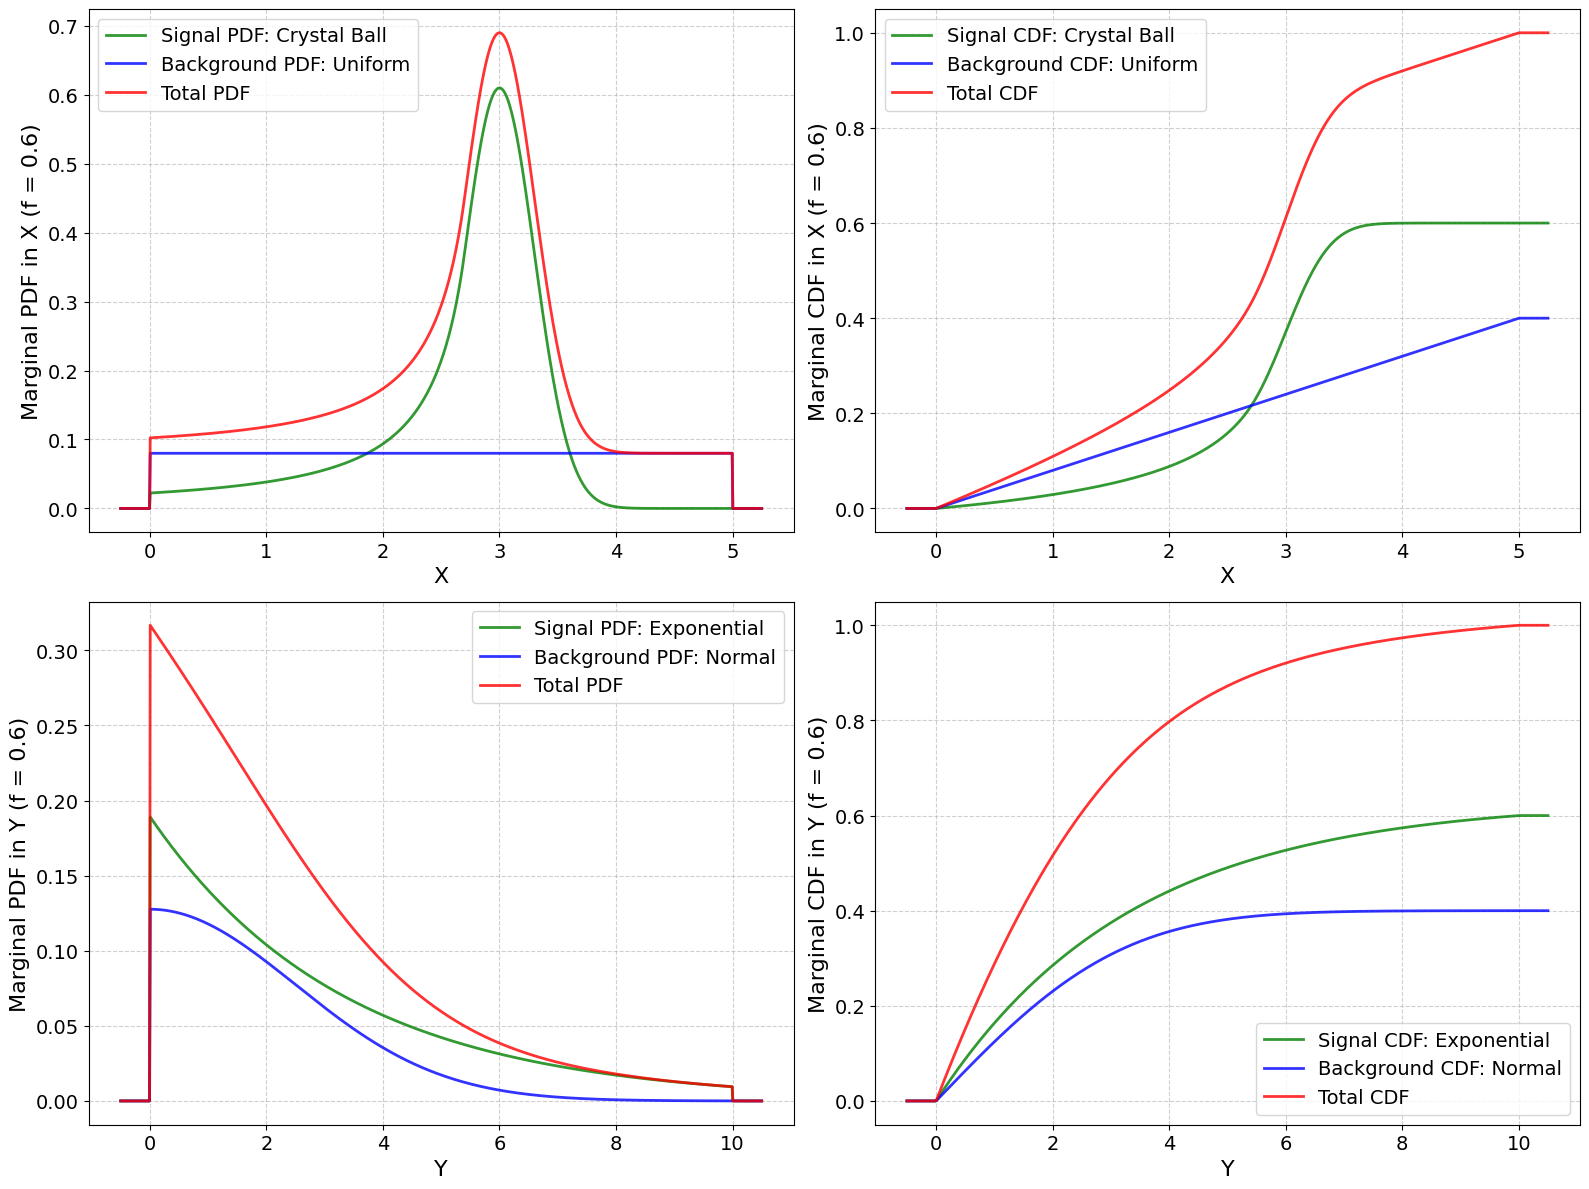

In [18]:
overall.plot_marginal()

## Plotting 2D Distribution
- As seen in `Notebook_Part_b` the plotting of the 2D Distributions (and all class distriutions) can be called using `plot_dist()`

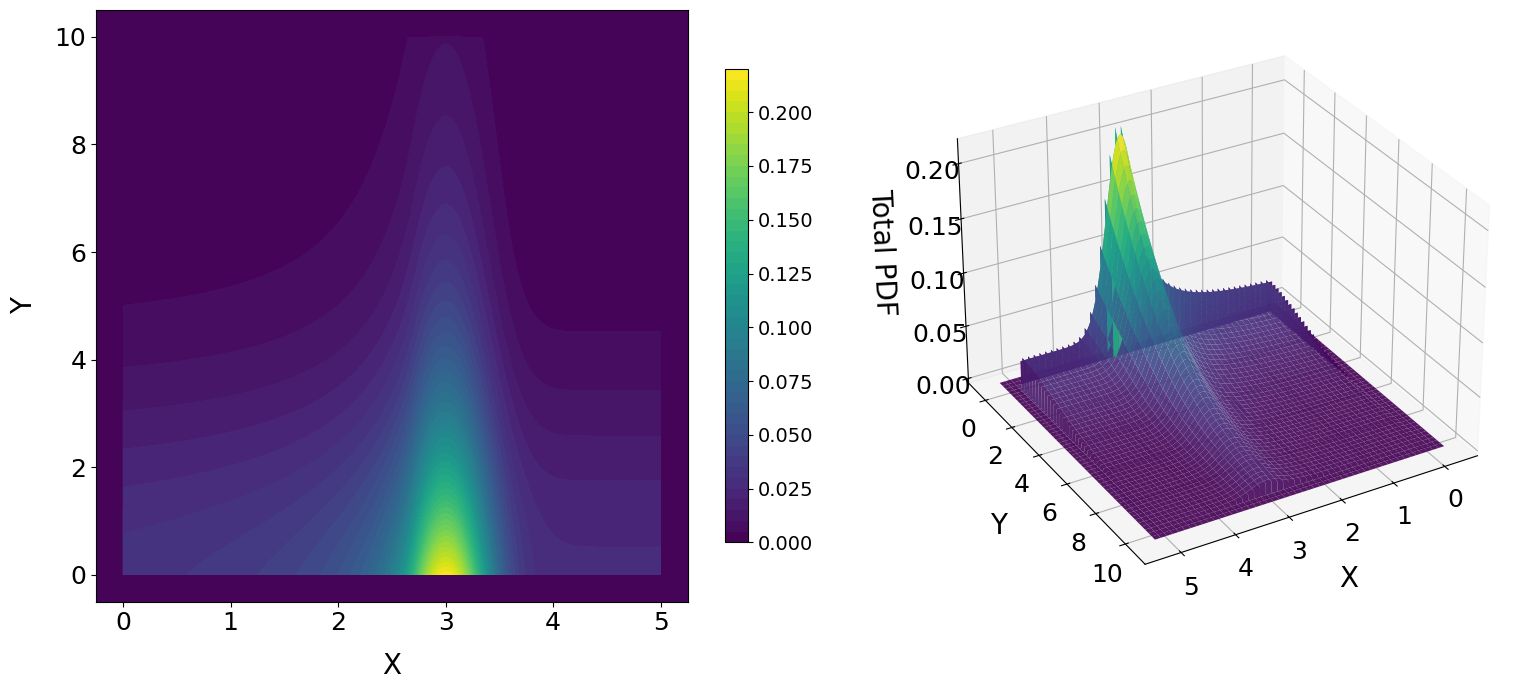

In [19]:
overall.plot_dist()